# MNIST

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

In [2]:
#Importing our dataset
train_data=pd.read_csv("../input/train.csv")
test_data=pd.read_csv("../input/test.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train_data.shape)
print(test_data.shape)

(42000, 785)
(28000, 784)


# Splitting the Dataset

In [5]:
#Splitting our training dataset into X and Y
train_features=train_data.iloc[:,1:]
train_label=train_data.iloc[:,0]

In [6]:
#Splitting our datsset into 80% training and 20% validation dataset
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(train_features,train_label,test_size=0.2, random_state=7)

print(x_train.shape)
print(x_cv.shape)

(33600, 784)
(8400, 784)


# Visualising the dataset
Plotting random images from the dataset

In [7]:
from random import sample

In [8]:
plot_num_images=6
num_rows_x_train=x_train.shape[0]

In [9]:
#creating a list of random indices from the training dataset
indices=sample(range(0,num_rows_x_train+1),plot_num_images)

In [10]:
indices

[5220, 16028, 15280, 31311, 25113, 3989]

In [11]:
img_rows=28
img_cols=28

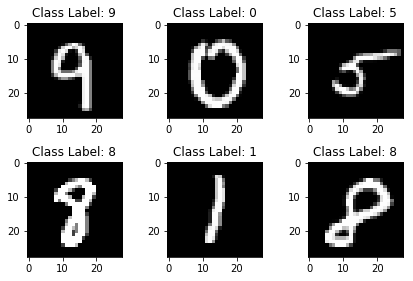

In [13]:
i=0
for index in indices:
    plt.subplot(2,3,i+1)
    img= x_train.iloc[index].values.reshape(img_rows,img_cols)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    class_label=y_train.iloc[index]
    plt.title('Class Label: {}'.format(class_label))
    i+=1
plt.tight_layout()
plt.show()

# Preprocessing

In [14]:
X_train=x_train.values.reshape(x_train.shape[0],img_rows,img_cols,1).astype('float32')
X_cv=x_cv.values.reshape(x_cv.shape[0],img_rows,img_cols,1).astype('float32')

In [15]:
X_test=test_data.values.reshape(test_data.shape[0],img_rows,img_cols,1).astype('float32')

In [16]:
X_train.shape

(33600, 28, 28, 1)

## Normalisataion

In [17]:
X_train/=255
X_test/=255
X_cv/=255

## One Hot Encoding

In [18]:
from keras.utils import to_categorical
Y_train=to_categorical(y_train)
Y_cv=to_categorical(y_cv)

Using TensorFlow backend.


In [19]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
num_classes=Y_train.shape[1]
num_classes

10

# Model Fitting

In [21]:
#Using Keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense, Dropout

In [22]:
input_shape=(img_rows,img_cols,1)
input_shape

(28, 28, 1)

In [23]:
#create model
model=Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit the model
history= model.fit(X_train,Y_train, validation_data=(X_cv,Y_cv),epochs=50,batch_size=200,verbose=1)



Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 4s 121us/step - loss: 0.4626 - acc: 0.8526 - val_loss: 0.1217 - val_acc: 0.9618
Epoch 2/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.1210 - acc: 0.9633 - val_loss: 0.0767 - val_acc: 0.9762
Epoch 3/50
33600/33600 [==============================] - 2s 58us/step - loss: 0.0873 - acc: 0.9727 - val_loss: 0.0632 - val_acc: 0.9811
Epoch 4/50
33600/33600 [==============================] - 2s 58us/step - loss: 0.0681 - acc: 0.9797 - val_loss: 0.0519 - val_acc: 0.9842
Epoch 5/50
33600/33600 [==============================] - 2s 58us/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.0486 - val_acc: 0.9877
Epoch 6/50
33600/33600 [==============================] - 2s 58us/step - loss: 0.0469 - acc: 0.9842 - val_loss: 0.0472 - val_acc: 0.9861
Epoch 7/50
33600/33600 [==============================] - 2s 58us/step - loss: 0.0427 - acc: 0.9856 - val_loss: 0.0464 - val_acc

In [24]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


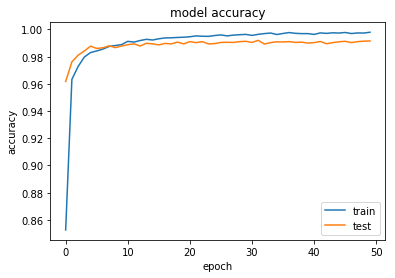

In [29]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

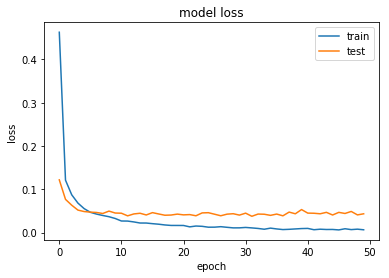

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [27]:
model.metrics_names

['loss', 'acc']

In [28]:
#evaluate
scores=model.evaluate(X_cv,Y_cv,verbose=0)
print('CV loss:', scores[0])
print('CV accuracy: ',scores[1]*100) 

CV loss: 0.0433968536998907
CV accuracy:  99.1547619047619


# Predict

In [30]:
predictions=model.predict_classes(X_test)

In [31]:
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [32]:
submissions.to_csv("mnist.csv", index=False, header=True)